In [59]:
# import kagglehub
#
# # Download latest version
# path = kagglehub.dataset_download("yasserh/titanic-dataset")
#
# print("Path to dataset files:", path)

Path to dataset files: /Users/soumikdutta/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [77]:
import matplotlib.pyplot as plt
import pandas as pd


titanic_df = pd.read_csv("../datasets/Titanic-Dataset.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
titanic_df.drop(columns=["PassengerId", "Name", 'Ticket', 'Cabin'], inplace=True)

In [80]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [92]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [79]:
titanic_df.shape

(891, 8)

In [66]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

<Axes: >

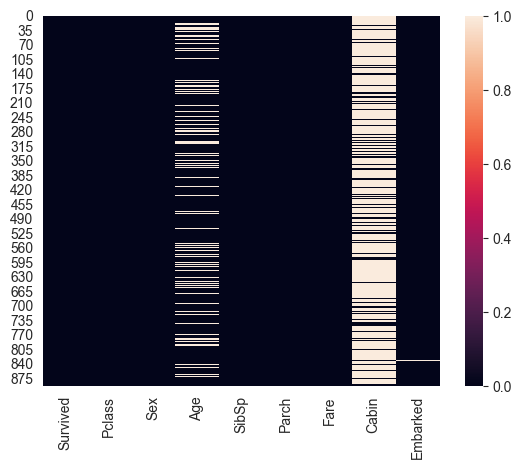

In [67]:
# check na values
import seaborn as sns

sns.heatmap(titanic_df.isnull())

In [85]:
"""Drop rows with missing values"""
titanic_df.dropna(inplace=True)
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [86]:
titanic_df.shape

(712, 8)

In [87]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
titanic_df['Sex'] = encoder.fit_transform(titanic_df['Sex']).astype(str)

In [88]:
oneHotEncoder = preprocessing.OneHotEncoder()
titanic_df['Embarked'] = encoder.fit_transform(titanic_df['Embarked']).astype(str)
t = pd.get_dummies(titanic_df['Embarked'])

titanic_df.describe()



,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


<Axes: >

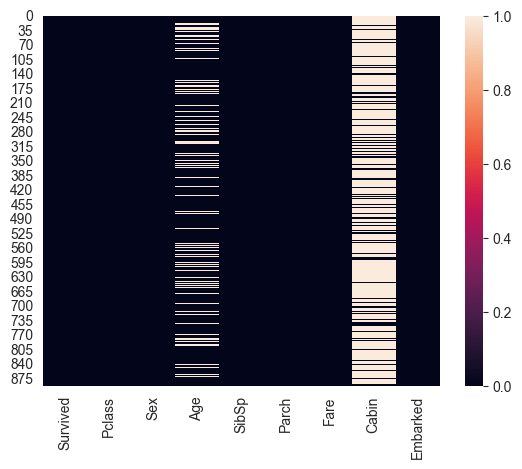

In [74]:
# check na values
import seaborn as sns

sns.heatmap(titanic_df.isnull())

In [75]:
plt.scatter(titanic_df['Survived'], titanic_df['Survived'])

Survived    706
Pclass      706
Sex         706
Age         529
SibSp       706
Parch       706
Fare        706
Cabin        19
Embarked    706
dtype: int64

In [57]:
titanic_df.dropna(inplace=True)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

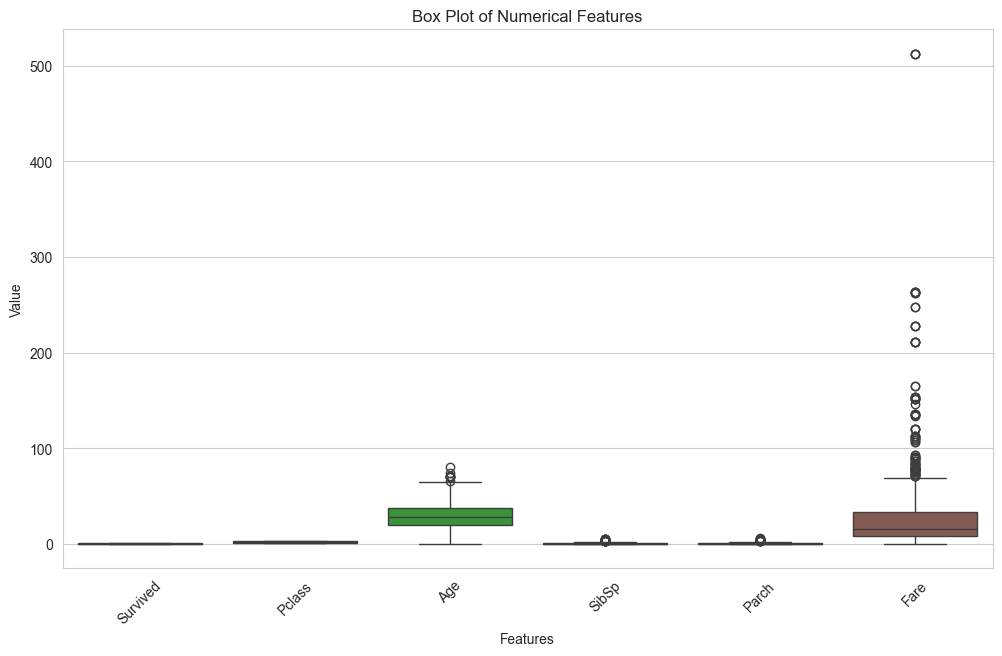

In [94]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def create_boxplot(df):
    df_copy = df.copy()
    num_cols = df_copy.select_dtypes(include=["float64","int64"]).columns
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df_copy[num_cols])
    plt.xticks(rotation=45)
    plt.title("Box Plot of Numerical Features")
    plt.ylabel("Value")
    plt.xlabel("Features")
    plt.show()

def replace_outliers_iqr(df):
    for column in df.select_dtypes(include=["float64","int64"]).columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the bounds
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])  # Replace values below lower bound
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])  # Replace values above upper bound

    return df

# fining outliers
# df_copy = titanic_df.copy(deep=True)
create_boxplot(titanic_df)


In [98]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop(columns=["Survived"])  # Features (all columns except 'Price')
y = titanic_df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [143, 569]